In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df_irradiance = pd.read_excel('/content/drive/My Drive/ColabNotebooks/outputFolder/irradiance-temp.xlsx')

Mounted at /content/drive


In [ ]:
df_No2= pd.read_excel('/content/drive/My Drive/ColabNotebooks/outputFolder/average_no2_data.xlsx')

In [ ]:
df_irradiance=df_irradiance[['City Name','Irradiance','Avg temp','Max temp','Min temp']]
df_irradiance.drop_duplicates(subset ='City Name',
                     keep = 'first', inplace = True)

In [ ]:
df_No2=df_No2[['City Name','Average NO2']]

In [ ]:
df_No2

,City Name,Average NO2
0,Anchorage,-0.924755
1,International Falls,-5.356933
2,Waltham,2.935737
3,Chicago,-0.639362
4,Dallas,1.893872
...,...,...
101,Lagos,0.511682
102,Boston,2.935737
103,Los Angeles,3.170728
104,Boston,2.935737


In [ ]:
df_irradiance

,City Name,Irradiance,Avg temp,Max temp,Min temp
0,Anchorage,2.568,2.650,23.444,-21.168
1,International Falls,3.616,3.684,32.750,-38.022
2,Waltham,3.864,9.892,34.066,-20.506
3,Chicago,3.890,10.030,29.722,-16.432
4,Dallas,4.700,18.836,41.866,-7.002
...,...,...,...,...,...
99,Cape Town,5.630,16.956,26.584,10.384
100,Johannesburg,5.646,17.322,36.164,-1.978
101,Lagos,4.600,26.582,31.794,19.382
102,Boston,3.864,9.892,34.066,-20.506


In [ ]:
df_final = pd.merge(df_irradiance,df_No2, on='City Name')

In [ ]:
df_final['DominationCount']=0;

In [ ]:
for i, row in df_final.iterrows():
    irr1 = row['Irradiance'] # Get the values irr, temp and no for this row
    temp1 = row['Avg temp']
    no1 = row['Average NO2']
    dominance = 0
    for j, row2 in df_final.iterrows(): # Go over the complete dataset
        irr2 = row2['Irradiance']
        temp2 = row2['Avg temp']
        no2 = row2['Average NO2']
        if (no2 < no1) or (temp2 > temp1) or (irr2 < irr1): # Check if the row has all features >= the current row
          continue
        if (no2 > no1) or (temp2 < temp1) or (irr2 > irr1): # And one of the features dominates
          dominance += 1
    
    df_final.at[i, 'DominationCount'] = dominance # Output the final dominance

In [ ]:
df_final=df_final.set_index('City Name')

**Pareto Analysis on Irradiance**

In [ ]:
df_final = df_final.sort_values(by='DominationCount', ascending=True)
df_final['Irradiancecum'] = df_final['Irradiance'].cumsum()/df_final['Irradiance'].sum()*100

In [ ]:
df_final

,Irradiance,Avg temp,Max temp,Min temp,Average NO2,DominationCount,Irradiancecum
City Name,,,,,,,
Clifton,3.940,10.692,36.528,-17.666,5.218186,0,0.864760
Sapporo,3.326,6.202,29.962,-17.818,1.644975,0,1.594757
Aomori,3.414,10.536,31.656,-7.368,7.732940,0,2.344069
Salt Lake City,4.838,8.904,35.584,-20.508,0.949328,0,3.405923
Nagano,3.866,8.708,28.812,-14.354,4.871493,0,4.254441
...,...,...,...,...,...,...,...
Mumbai,5.182,26.794,43.640,12.052,-1.970403,19,96.444829
Rio de Janeiro,4.704,23.314,35.144,15.582,0.702330,21,97.477273
Lagos,4.600,26.582,31.794,19.382,0.511682,27,98.486890


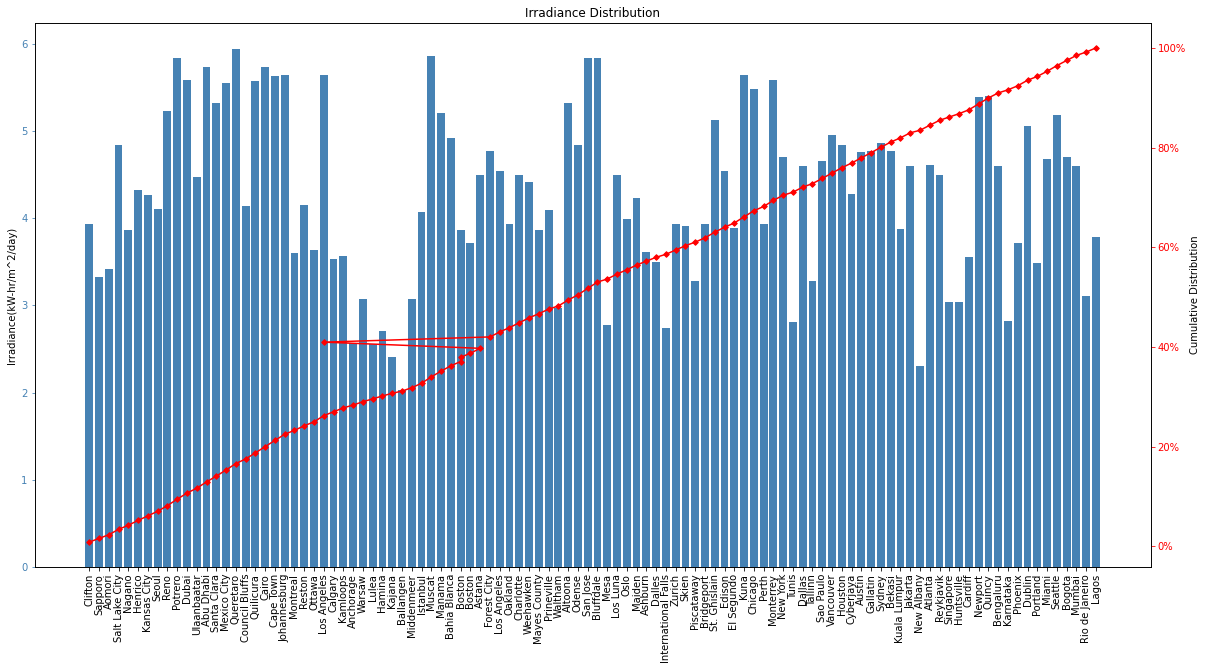

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

color1 = 'steelblue'
color2 = 'red'
line_size = 4
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_final.index, df_final['Irradiance'], color=color1)
ax2 = ax.twinx()
ax2.plot(df_final.index, df_final['Irradiancecum'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors=color1,)
ax2.tick_params(axis='y', colors=color2)

ax.set_xticklabels(df_final.index, rotation = 90)
plt.title("Irradiance Distribution")
ax.set_ylabel('Irradiance(kW-hr/m^2/day)')
ax2.set_ylabel('Cumulative Distribution')

plt.show()

**Pareto Analysis for Average Temperature**

In [ ]:
df_final = df_final.sort_values(by='Avg temp', ascending=False)
df_final['Avgtempcum'] = df_final['Avg temp'].cumsum()/df_final['Avg temp'].sum()*100

In [ ]:
df_final

,Irradiance,Avg temp,Max temp,Min temp,Average NO2,DominationCount,Irradiancecum,Avgtempcum
City Name,,,,,,,,
Muscat,5.860,28.452,41.726,15.200,1.691289,1,34.013143,1.894607
Abu Dhabi,5.738,28.370,42.986,15.050,5.075743,0,12.935837,3.783754
Dubai,5.582,27.928,38.074,17.544,5.075743,0,10.694485,5.643469
Jakarta,4.772,27.544,32.614,22.898,1.946782,8,81.108736,7.477613
Bekasi,4.772,27.544,32.614,22.898,1.946782,8,78.992928,9.311757
...,...,...,...,...,...,...,...,...
Astana,3.722,2.878,34.484,-36.186,-2.374143,1,38.749567,99.631893
Anchorage,2.568,2.650,23.444,-21.168,-0.924755,1,28.352699,99.808355
Kajana,2.412,2.476,26.268,-27.292,0.398208,1,30.712571,99.973231


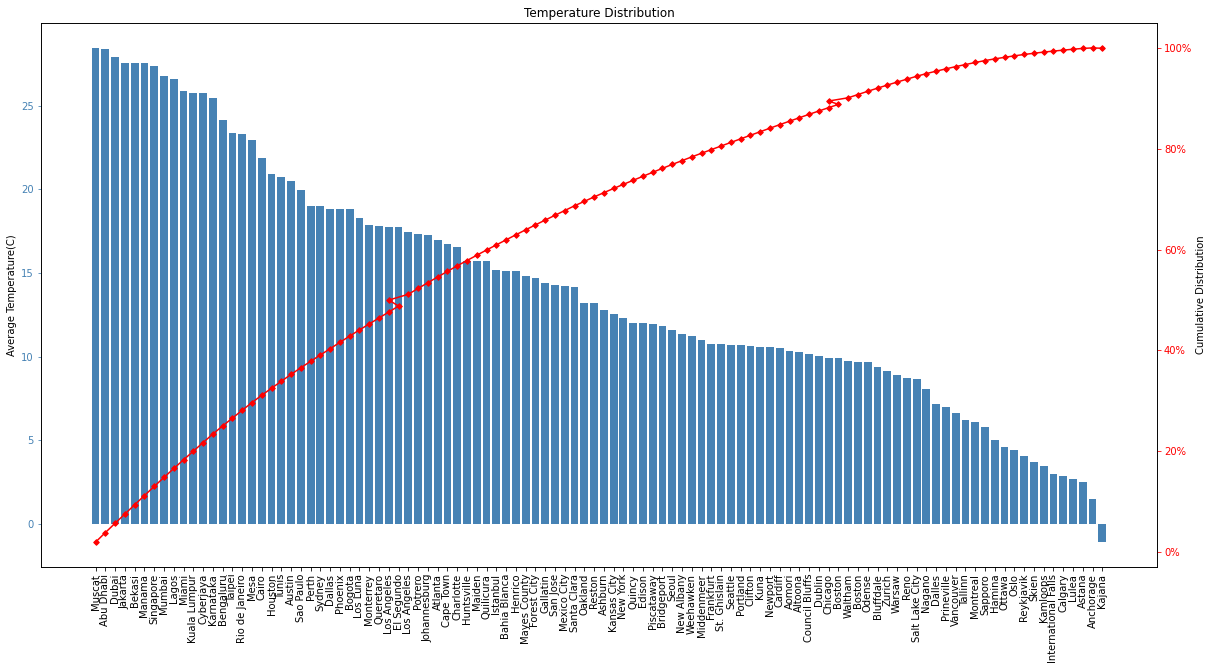

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

color1 = 'steelblue'
color2 = 'red'
line_size = 4
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_final.index, df_final['Avg temp'], color=color1)
ax2 = ax.twinx()
ax2.plot(df_final.index, df_final['Avgtempcum'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

ax.set_xticklabels(df_final.index, rotation = 90)
plt.title("Temperature Distribution")
ax.set_ylabel('Average Temperature(C)')
ax2.set_ylabel('Cumulative Distribution')
plt.show()

**Pareto Analysis for Average No2**

In [ ]:
df_final = df_final.sort_values(by='Average NO2', ascending=False)
df_final['AvgNo2cum'] = df_final['Average NO2'].cumsum()/df_final['Average NO2'].sum()*100

In [ ]:
df_final

,Irradiance,Avg temp,Max temp,Min temp,Average NO2,DominationCount,Irradiancecum,Avgtempcum,AvgNo2cum
City Name,,,,,,,,,
Seoul,4.108,11.802,33.542,-13.786,8.174934,0,7.040547,76.149470,8.495159
Aomori,3.414,10.536,31.656,-7.368,7.732940,0,2.344069,84.828891,16.531011
Middenmeer,3.072,11.200,26.942,-2.302,6.351813,1,31.832807,78.422972,23.131634
Bridgeport,3.906,11.938,31.406,-13.200,5.218186,3,60.318951,75.363579,28.554224
New York,3.940,12.532,30.264,-10.884,5.218186,5,68.187385,72.147967,33.976815
...,...,...,...,...,...,...,...,...,...
Dalles,4.238,8.650,34.170,-13.838,-3.737073,2,56.433679,94.437371,168.330986
Bogota,4.684,18.802,27.836,10.404,-3.765085,18,95.307472,42.830564,164.418417
International Falls,3.616,3.684,32.750,-38.022,-5.356933,2,57.227326,99.012343,158.851645


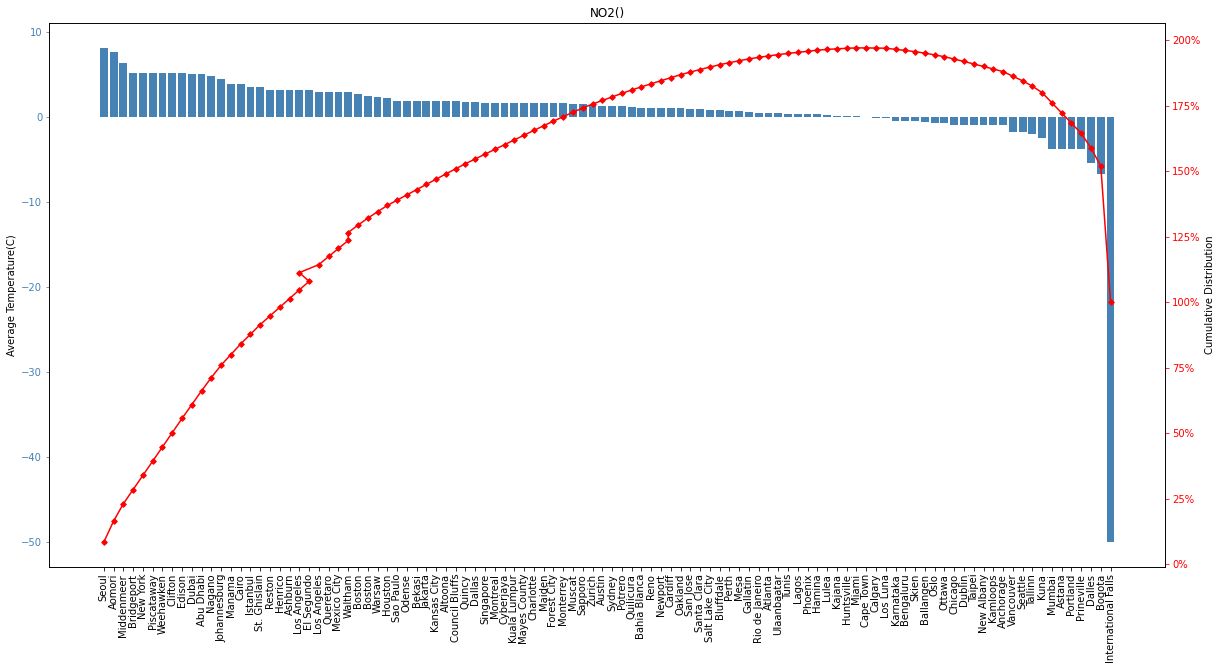

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

color1 = 'steelblue'
color2 = 'red'
line_size = 4
fig, ax = plt.subplots(figsize=(20,10))
ax.bar(df_final.index, df_final['Average NO2'], color=color1)
ax2 = ax.twinx()
ax2.plot(df_final.index, df_final['AvgNo2cum'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

ax.set_xticklabels(df_final.index, rotation = 90)
plt.title("NO2()")
ax.set_ylabel('Average Temperature(C)')
ax2.set_ylabel('Cumulative Distribution')
plt.show()

## **PLOTS**

**3-D SCATTER CHART**

In [ ]:
import plotly.express as px

df_final_irr=df_final.copy()
is_0=df_final['DominationCount']==0
fig = px.scatter_3d(df_final_irr, x='Irradiance', y='Average NO2', z='Avg temp',
                    color='DominationCount',symbol=is_0,hover_data=[df_final_irr.index,'DominationCount'])
fig.update(layout_showlegend=False)

fig.show()

**SCATTTER MATRIX CHARTS**

In [ ]:
import plotly.express as px

df_final2=df_final.sort_index()
fig = px.scatter_matrix(df_final2,
    dimensions=["Irradiance", "Average NO2", "Avg temp"],
    color=df_final2.index)

fig.show()

In [ ]:

df1=df_final.reset_index(inplace=False)


In [ ]:
df1=df1.drop(columns=['DominationCount'])

df2 = pd.melt(df1, id_vars=['City Name','Irradiancecum','Avgtempcum','AvgNo2cum'], 
                  var_name="Indicators", value_name="Value")

In [ ]:
df2

,City Name,Irradiancecum,Avgtempcum,AvgNo2cum,Indicators,Value
0,Seoul,7.040547,76.149470,8.495159,Irradiance,4.108000
1,Aomori,2.344069,84.828891,16.531011,Irradiance,3.414000
2,Middenmeer,31.832807,78.422972,23.131634,Irradiance,3.072000
3,Bridgeport,60.318951,75.363579,28.554224,Irradiance,3.906000
4,New York,68.187385,72.147967,33.976815,Irradiance,3.940000
...,...,...,...,...,...,...
525,Dalles,56.433679,94.437371,168.330986,Average NO2,-3.737073
526,Bogota,95.307472,42.830564,164.418417,Average NO2,-3.765085
527,International Falls,57.227326,99.012343,158.851645,Average NO2,-5.356933
528,Frankfurt,99.168163,79.153327,151.920446,Average NO2,-6.669928


**POLAR SCATTER CHART**

In [ ]:
import plotly.express as px

df_final3=df2.sort_values('City Name')

fig = px.scatter_polar(df_final3,r='Value'
                       ,theta='Indicators',color='City Name'
                       )
fig.show()

**POLAR LINE CHART**

In [ ]:
import plotly.express as px

fig = px.line_polar(df_final3,r='Value'
                       ,theta='Indicators',color='City Name',line_close=True,
                     template="plotly_dark"
                       )
fig.show()